<table align="left"  width="100%"> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="35%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Maksim Dimitrijev (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>) 
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\Y}{ \mymatrix{rr}{0 & -i \\ i & 0} } $ 
$ \newcommand{\S}{ \mymatrix{rr}{1 & 0 \\ 0 & i} } $ 
$ \newcommand{\T}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{i \frac{\pi}{4}}} } $ 
$ \newcommand{\Sdg}{ \mymatrix{rr}{1 & 0 \\ 0 & -i} } $ 
$ \newcommand{\Tdg}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{-i \frac{\pi}{4}}} } $


<h1> Quantum gates with complex numbers </h1>

Now we will finally write some code to use quantum gates with complex numbers on qubits. We will begin with $Y$ operator, and $Y$-gate is called in a way similar to calling an $X$-gate.

{'1': 10000}


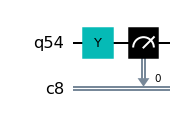

In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(1)
creg1 = ClassicalRegister(1)
mycircuit1 = QuantumCircuit(qreg1,creg1)

# apply y-gate
mycircuit1.y(qreg1[0])

mycircuit1.measure(qreg1,creg1)

job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=10000)
counts1 = job.result().get_counts(mycircuit1)
print(counts1) # print the outcomes

mycircuit1.draw(output='mpl')

As we can see, the qubit, which was initially set to the state $\ket{0}$ always outputs the state $\ket{1}$, after applying $Y$-gate and measurement. Let's check the statevector simulator to see what state does the qubit have before the measurement.

In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg2 =  QuantumRegister(1)
creg2 = ClassicalRegister(1)
mycircuit2 = QuantumCircuit(qreg2,creg2)

# apply y-gate
mycircuit2.y(qreg2[0])

job = execute(mycircuit2,Aer.get_backend('statevector_simulator'))
current_quantum_state=job.result().get_statevector(mycircuit2)
print(current_quantum_state)

[0.-0.j 0.+1.j]


The statevector confirms that the amplitude of the state $\ket{0}$ is zero, and so we will observe only state $\ket{1}$. Let's see what happens if we apply $Y$-gate to the qubit, which is in state $\ket{1}$.

<h3> Task 1 </h3>

Remember that $X$-gate flips the value of a qubit.

Design a quantum circuit with a single qubit. Set the value of qubit to $ \ket{1} $ by using $X$-gate. After that apply $Y$-gate and check the outcome on a statevector_simulator.

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

# apply x-gate
mycircuit.x(qreg[0])

# apply y-gate
mycircuit.y(qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'))
current_quantum_state=job.result().get_statevector(mycircuit)
print(current_quantum_state)

[ 6.123234e-17-1.j -0.000000e+00+0.j]


<a href="C04_Quantum_Gates_With_Complex_Numbers_Solutions.ipynb#task1">click for our solution</a>

<h2> Phase gates </h2>

Now we will observe the phase gates. Such gates do not change the probabilities of the states to be observed, but change the local phase. The simplest phase gate that we already know is $Z = \Z$. Here are two famous phase operators that change the phase by smaller amount compared to the Z operator:

$$
S = \S \mbox{ and } T = \T.
$$

The conjugate versions of these operators are

$$
S^{\dagger} = \Sdg \mbox{ and } T^{\dagger} = \Tdg.
$$

As you can guess, in case of $Z$ operator its conjugate version is trivial: $Z = Z^{\dagger}$.

Since $i^2 = -1$, it is easy to see that $S^2 = Z$, or, in other words, $S = \sqrt{Z}$.

<h3> Task 2 </h3>

Find the relationship between the following operators:
<ul>
    <li>$S$ and $T$;</li>
    <li>$Z$ and $T$.</li>
</ul>

<a href="C04_Quantum_Gates_With_Complex_Numbers_Solutions.ipynb#task2">click for our solution</a>

We will discuss the phase and phase gates in more details in the next notebooks. Now we will check the behavior of the gates with the code.

<h2> Phase gates in Qiskit </h2>

The syntax of the mentioned phase gates are quite simple. One can guess the gate from the provided notations.

    mycircuit.s(quantum_register)
    mycircuit.t(quantum_register)
    mycircuit.sdg(quantum_register)
    mycircuit.tdg(quantum_register)

Let's make a quantum circuit with 4 qubits and apply each of the gates - one for each qubit. Guess the outcome of the measurement.

{'0000': 10000}


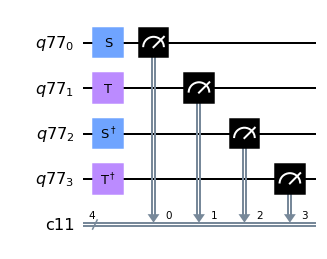

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg3 =  QuantumRegister(4)
creg3 = ClassicalRegister(4)
mycircuit3 = QuantumCircuit(qreg3,creg3)

mycircuit3.s(qreg3[0])
mycircuit3.t(qreg3[1])
mycircuit3.sdg(qreg3[2])
mycircuit3.tdg(qreg3[3])

mycircuit3.measure(qreg3,creg3)

job = execute(mycircuit3,Aer.get_backend('qasm_simulator'),shots=10000)
counts3 = job.result().get_counts(mycircuit3)
print(counts3) # print the outcomes

mycircuit3.draw(output='mpl')

The output outcome should not be surprising, the change of phase did not change the probabilities. Now let's convince ourselves that this is also the case when our qubit is in superposition.

<h3> Task 3 </h3>

For each one of the discussed 4 phase gates construct the following circuit:

<ul>
    <li>Create a circuit with one qubit,</li>
    <li>apply Hadamard operator,</li>
    <li>apply the corresponding phase operator,</li>
    <li>make a measurement.</li>
</ul>

What is the measurement outcome in each case?

{'0': 519, '1': 481}


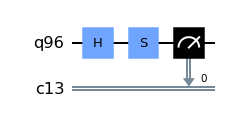

In [14]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.s(qreg[0])
circuit.measure(qreg, creg)
job = execute(circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(circuit)
print(counts)
circuit.draw('mpl')

{'1': 517, '0': 483}


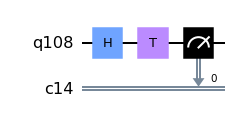

In [15]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.t(qreg[0])
circuit.measure(qreg, creg)
job = execute(circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(circuit)
print(counts)
circuit.draw('mpl')

{'1': 516, '0': 484}


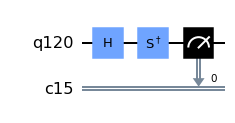

In [16]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.sdg(qreg[0])
circuit.measure(qreg, creg)
job = execute(circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(circuit)
print(counts)
circuit.draw('mpl')

{'0': 502, '1': 498}


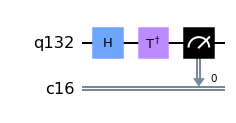

In [17]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.tdg(qreg[0])
circuit.measure(qreg, creg)
job = execute(circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(circuit)
print(counts)
circuit.draw('mpl')

<a href="C04_Quantum_Gates_With_Complex_Numbers_Solutions.ipynb#task3">click for our solution</a>

The phase gate applied between two Hadamard operators can make the difference. Remember what happens with the qubit in state $\ket{0}$ after applying the following sequence: $HZH$ (if not, just write the code and check :) )?

{'1': 1000}


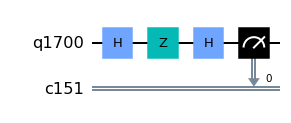

In [32]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.z(qreg[0])
circuit.h(qreg[0])
circuit.measure(qreg, creg)
job = execute(circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(circuit)
print(counts)
circuit.draw('mpl')

<h3> Task 4 </h3>

For each one of the discussed 4 phase gates construct the following circuit:

<ul>
    <li>Create a circuit with one qubit,</li>
    <li>apply Hadamard operator,</li>
    <li>apply the corresponding phase operator,</li>
    <li>apply Hadamard operator,</li>
    <li>make a measurement.</li>
</ul>

Guess the measurement outcome in each case before executing the code.

{'0': 501, '1': 499}


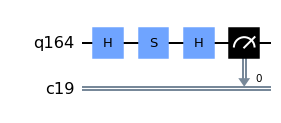

In [20]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.s(qreg[0])
circuit.h(qreg[0])
circuit.measure(qreg, creg)
job = execute(circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(circuit)
print(counts)
circuit.draw('mpl')

{'0': 859, '1': 141}


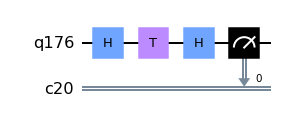

In [21]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.t(qreg[0])
circuit.h(qreg[0])
circuit.measure(qreg, creg)
job = execute(circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(circuit)
print(counts)
circuit.draw('mpl')

{'0': 527, '1': 473}


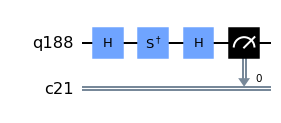

In [22]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.sdg(qreg[0])
circuit.h(qreg[0])
circuit.measure(qreg, creg)
job = execute(circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(circuit)
print(counts)
circuit.draw('mpl')

{'0': 855, '1': 145}


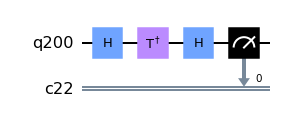

In [23]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.tdg(qreg[0])
circuit.h(qreg[0])
circuit.measure(qreg, creg)
job = execute(circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(circuit)
print(counts)
circuit.draw('mpl')

<a href="C04_Quantum_Gates_With_Complex_Numbers_Solutions.ipynb#task4">click for our solution</a>

Although $T^4 = Z$, the presence of just $T$-gate and $H$-gate gives very powerful tool for putting qubit into different states. We will cover this in more details when we check Bloch sphere. Let's just check how different number of applied operators $T$ and $H$ gives different measurement outcomes. In the following example, we apply the sequence of $T$-gate and $H$-gate for different number of times. Notice how different are the probabilities to observe states $\ket{0}$ and $\ket{1}$.

In [24]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

for i in range(25):
    qreg1 =  QuantumRegister(1)
    creg1 = ClassicalRegister(1)
    mycircuit1 = QuantumCircuit(qreg1,creg1)
    for j in range(i):
        mycircuit1.t(qreg1[0])
        mycircuit1.h(qreg1[0])
    mycircuit1.measure(qreg1,creg1)

    job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=10000)
    counts1 = job.result().get_counts(mycircuit1)
    print('gates applied',i,'times, outcome:',counts1) # print the outcomes
    print(' ')

gates applied 0 times, outcome: {'0': 10000}
 
gates applied 1 times, outcome: {'0': 4904, '1': 5096}
 
gates applied 2 times, outcome: {'0': 8517, '1': 1483}
 
gates applied 3 times, outcome: {'0': 7484, '1': 2516}
 
gates applied 4 times, outcome: {'0': 5619, '1': 4381}
 
gates applied 5 times, outcome: {'0': 9806, '1': 194}
 
gates applied 6 times, outcome: {'1': 5404, '0': 4596}
 
gates applied 7 times, outcome: {'0': 9377, '1': 623}
 
gates applied 8 times, outcome: {'0': 6416, '1': 3584}
 
gates applied 9 times, outcome: {'0': 6632, '1': 3368}
 
gates applied 10 times, outcome: {'0': 9147, '1': 853}
 
gates applied 11 times, outcome: {'1': 5347, '0': 4653}
 
gates applied 12 times, outcome: {'0': 9897, '1': 103}
 
gates applied 13 times, outcome: {'1': 4457, '0': 5543}
 
gates applied 14 times, outcome: {'0': 7829, '1': 2171}
 
gates applied 15 times, outcome: {'0': 8259, '1': 1741}
 
gates applied 16 times, outcome: {'1': 4907, '0': 5093}
 
gates applied 17 times, outcome: {'0':

<h3> Task 5 </h3>

Repeat previous experiment for different number of $H$-gates and $T$-gates, but this time applying them in opposite order: first $H$ and then $T$.

In [28]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

for i in range(25):
    qreg1 =  QuantumRegister(1)
    creg1 = ClassicalRegister(1)
    mycircuit1 = QuantumCircuit(qreg1,creg1)
    for j in range(i):
        mycircuit1.h(qreg1[0])
        mycircuit1.t(qreg1[0])
    mycircuit1.measure(qreg1,creg1)

    job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)
    counts1 = job.result().get_counts(mycircuit1)
    print('gates applied',i,'times, outcome:',counts1) # print the outcomes
    print(' ')

gates applied 0 times, outcome: {'0': 1000}
 
gates applied 1 times, outcome: {'1': 477, '0': 523}
 
gates applied 2 times, outcome: {'0': 852, '1': 148}
 
gates applied 3 times, outcome: {'0': 758, '1': 242}
 
gates applied 4 times, outcome: {'0': 585, '1': 415}
 
gates applied 5 times, outcome: {'0': 978, '1': 22}
 
gates applied 6 times, outcome: {'0': 466, '1': 534}
 
gates applied 7 times, outcome: {'1': 60, '0': 940}
 
gates applied 8 times, outcome: {'0': 622, '1': 378}
 
gates applied 9 times, outcome: {'0': 701, '1': 299}
 
gates applied 10 times, outcome: {'0': 925, '1': 75}
 
gates applied 11 times, outcome: {'1': 529, '0': 471}
 
gates applied 12 times, outcome: {'0': 984, '1': 16}
 
gates applied 13 times, outcome: {'1': 460, '0': 540}
 
gates applied 14 times, outcome: {'0': 775, '1': 225}
 
gates applied 15 times, outcome: {'1': 168, '0': 832}
 
gates applied 16 times, outcome: {'1': 481, '0': 519}
 
gates applied 17 times, outcome: {'0': 997, '1': 3}
 
gates applied 18 

<a href="C04_Quantum_Gates_With_Complex_Numbers_Solutions.ipynb#task5">click for our solution</a>

We will check one more combination of the gates - we will apply the sequence of $HTH$ for multiple times and will check the measurement outcomes.

In [27]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

for i in range(25):
    qreg1 =  QuantumRegister(1)
    creg1 = ClassicalRegister(1)
    mycircuit1 = QuantumCircuit(qreg1,creg1)
    for j in range(i):
        mycircuit1.h(qreg1[0])
        mycircuit1.t(qreg1[0])
        mycircuit1.h(qreg1[0])
    mycircuit1.measure(qreg1,creg1)

    job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=10000)
    counts1 = job.result().get_counts(mycircuit1)
    print('gates applied',i,'times, outcome:',counts1) # print the outcomes
    print(' ')

gates applied 0 times, outcome: {'0': 10000}
 
gates applied 1 times, outcome: {'0': 8463, '1': 1537}
 
gates applied 2 times, outcome: {'0': 5019, '1': 4981}
 
gates applied 3 times, outcome: {'1': 8514, '0': 1486}
 
gates applied 4 times, outcome: {'1': 10000}
 
gates applied 5 times, outcome: {'1': 8589, '0': 1411}
 
gates applied 6 times, outcome: {'0': 4997, '1': 5003}
 
gates applied 7 times, outcome: {'0': 8534, '1': 1466}
 
gates applied 8 times, outcome: {'0': 10000}
 
gates applied 9 times, outcome: {'0': 8601, '1': 1399}
 
gates applied 10 times, outcome: {'0': 5026, '1': 4974}
 
gates applied 11 times, outcome: {'1': 8562, '0': 1438}
 
gates applied 12 times, outcome: {'1': 10000}
 
gates applied 13 times, outcome: {'1': 8510, '0': 1490}
 
gates applied 14 times, outcome: {'0': 4999, '1': 5001}
 
gates applied 15 times, outcome: {'1': 1494, '0': 8506}
 
gates applied 16 times, outcome: {'0': 10000}
 
gates applied 17 times, outcome: {'0': 8488, '1': 1512}
 
gates applied 18

<h3> Task 6 (discussion) </h3>

Why do the outcomes repeat after several iterations?

<a href="C04_Quantum_Gates_With_Complex_Numbers_Solutions.ipynb#task6">click for our solution</a>